In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d vivmankar/asian-vs-african-elephant-image-classification

Dataset URL: https://www.kaggle.com/datasets/vivmankar/asian-vs-african-elephant-image-classification
License(s): CC0-1.0
100% 51.8M/51.8M [00:01<00:00, 50.6MB/s]
100% 51.8M/51.8M [00:01<00:00, 46.1MB/s]


In [ ]:
#Unzip the file
import zipfile
zip_ref = zipfile.ZipFile('/content/asian-vs-african-elephant-image-classification.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
train= keras.utils.image_dataset_from_directory(
    directory='/content/dataset/train',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
    )
validation= keras.utils.image_dataset_from_directory(
    directory='/content/dataset/train',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
    )

Found 840 files belonging to 2 classes.
Found 840 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train.map(process)
validation_ds = validation.map(process)

In [ ]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 516128)            0         
                                                                 
 dense (Dense)               (None, 128)               66064512  
                                                                 
 dropout (Dropout)           (None, 128)               0

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=30,validation_data=validation_ds)

Epoch 1/30
27/27 [==============================] - 10s 118ms/step - loss: 33.0050 - accuracy: 0.5071 - val_loss: 0.7477 - val_accuracy: 0.6071
Epoch 2/30
27/27 [==============================] - 5s 165ms/step - loss: 2.6907 - accuracy: 0.5821 - val_loss: 0.6904 - val_accuracy: 0.4988
Epoch 3/30
27/27 [==============================] - 3s 100ms/step - loss: 0.7636 - accuracy: 0.5952 - val_loss: 0.7991 - val_accuracy: 0.5000
Epoch 4/30
27/27 [==============================] - 3s 115ms/step - loss: 0.7784 - accuracy: 0.5881 - val_loss: 0.6858 - val_accuracy: 0.5286
Epoch 5/30
27/27 [==============================] - 3s 112ms/step - loss: 0.6555 - accuracy: 0.6167 - val_loss: 0.6780 - val_accuracy: 0.5476
Epoch 6/30
27/27 [==============================] - 3s 116ms/step - loss: 0.6100 - accuracy: 0.6512 - val_loss: 0.6703 - val_accuracy: 0.6071
Epoch 7/30
27/27 [==============================] - 3s 108ms/step - loss: 0.5860 - accuracy: 0.6571 - val_loss: 0.6722 - val_accuracy: 0.6774
Epoc

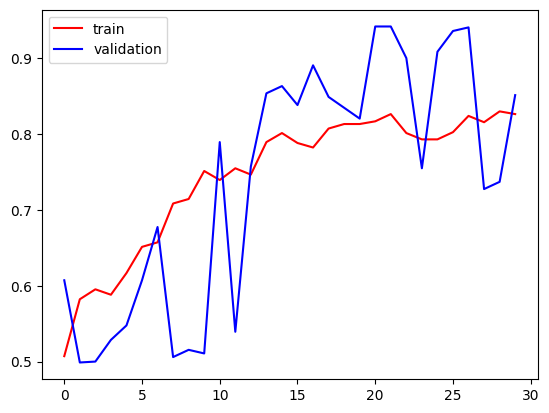

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

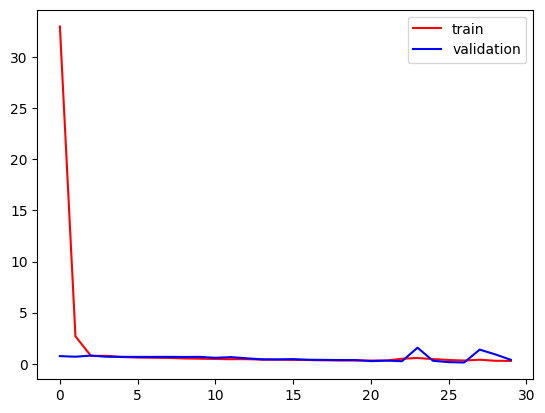

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

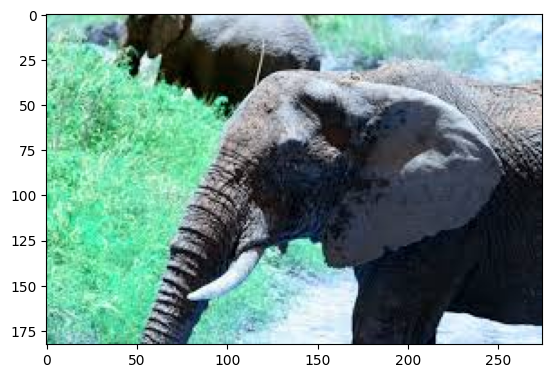

In [ ]:
import cv2
test_img = cv2.imread('/content/dataset/test/African/af_te11.jpg')
plt.imshow(test_img)
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))


In [ ]:
model.predict(test_input)

1/1 [==============================] - 1s 537ms/step


array([[0.]], dtype=float32)